# Declaration of Originality

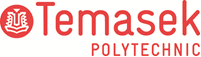

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : XAVIER WONG SHU CAN (2404733D)
* Tutorial Group                : P04
* Tutor						    : EMILE SABASTIAN
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy import stats
from scipy.stats import randint

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [8]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "dataset.csv"
df = pd.read_csv(FILE_PATH)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
## Check for missing data
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [5]:
## Describe data distribution
df.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [11]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace("/", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
      .str.replace("'", "", regex=False)
)

# Fix known typo exactly as in his notebook
df = df.rename(columns={
    "Nacionality": "Nationality",
    "Age_at_enrollment": "Age"
})

df.columns.tolist()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nationality',
 'Mother_qualification',
 'Father_qualification',
 'Mother_occupation',
 'Father_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Target']

In [13]:
# 2) Define categorical columns (same set as his, but in a clean list)
categorical_cols = [
    "Marital_status",
    "Application_mode",
    "Application_order",
    "Course",
    "Daytime_evening_attendance",
    "Previous_qualification",
    "Nationality",
    "Mother_qualification",
    "Father_qualification",
    "Mother_occupation",
    "Father_occupation",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International",
    "Target"
]

# Cast to category dtype (same idea as his)
df[categorical_cols] = df[categorical_cols].astype("category")

In [14]:
df[categorical_cols] = df[categorical_cols].astype("category")

In [16]:
from sklearn.preprocessing import OrdinalEncoder

target_encoder = OrdinalEncoder(
    categories=[["Dropout", "Enrolled", "Graduate"]]
)

df["target_encoded"] = target_encoder.fit_transform(df[["Target"]])


In [18]:
target_map = {
    "Dropout": 0,
    "Enrolled": 1,
    "Graduate": 2
}

df["target_encoded"] = df["Target"].map(target_map)


In [20]:
df = df.drop(columns=["Target"])

In [21]:
chi_square_drop_cols = [
    "Nationality",
    "International",
    "Educational_special_needs"
]

df = df.drop(columns=chi_square_drop_cols)


In [22]:
df.info()
df.head()
df["target_encoded"].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   category
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Mother_qualification                          4424 non-null   category
 7   Father_qualification                          4424 non-null   category
 8   Mother_occupation                             4424 non-null   category
 9   Father_occupation                             4424 n

target_encoded
2    2209
0    1421
1     794
Name: count, dtype: int64

In [23]:
df["target_encoded"] = df["target_encoded"].astype(int)

In [24]:
df["target_encoded"].dtype

dtype('int64')

## 3.2 Train-Test Split

In [25]:
# Features and target
X = df.drop(columns=["target_encoded"])
y = df["target_encoded"]


In [26]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [27]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align columns (important)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

# 4. Modelling

### 4.2 Train Model

In [29]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression

lr_baseline = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)

lr_baseline.fit(X_train_enc, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [30]:
## Initialise and train model
from sklearn.tree import DecisionTreeClassifier

dt_baseline = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)

dt_baseline.fit(X_train_enc, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [31]:
## Initialise and train model
from sklearn.ensemble import RandomForestClassifier

rf_baseline = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_baseline.fit(X_train_enc, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
## Initialise and train model
from sklearn.ensemble import GradientBoostingClassifier

gb_baseline = GradientBoostingClassifier(
    random_state=42
)

gb_baseline.fit(X_train_enc, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

In [33]:
## Evaluate model
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)

y_pred_lr = lr_baseline.predict(X_test_enc)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Macro F1:", f1_score(y_test, y_pred_lr, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.727683615819209
Balanced Accuracy: 0.6989462506181018
Macro F1: 0.6887115500005773

Confusion Matrix:
[[198  62  24]
 [ 28  97  34]
 [ 16  77 349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       284
           1       0.41      0.61      0.49       159
           2       0.86      0.79      0.82       442

    accuracy                           0.73       885
   macro avg       0.70      0.70      0.69       885
weighted avg       0.76      0.73      0.74       885



In [34]:
## Evaluate model
y_pred_dt = dt_baseline.predict(X_test_enc)

print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))
print("Macro F1:", f1_score(y_test, y_pred_dt, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.6903954802259887
Balanced Accuracy: 0.6202006331127339
Macro F1: 0.6195144729726488

Confusion Matrix:
[[204  45  35]
 [ 53  55  51]
 [ 36  54 352]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       284
           1       0.36      0.35      0.35       159
           2       0.80      0.80      0.80       442

    accuracy                           0.69       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.69      0.69      0.69       885



In [35]:
## Evaluate model
y_pred_rf = rf_baseline.predict(X_test_enc)

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.7570621468926554
Balanced Accuracy: 0.6591589912469686
Macro F1: 0.6674934070988946

Confusion Matrix:
[[210  26  48]
 [ 41  49  69]
 [ 11  20 411]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       284
           1       0.52      0.31      0.39       159
           2       0.78      0.93      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



In [36]:
## Evaluate model
y_pred_gb = gb_baseline.predict(X_test_enc)

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_gb))
print("Macro F1:", f1_score(y_test, y_pred_gb, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Results
Accuracy: 0.7593220338983051
Balanced Accuracy: 0.6677146842846926
Macro F1: 0.6754840669213394

Confusion Matrix:
[[214  27  43]
 [ 41  53  65]
 [ 12  25 405]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       284
           1       0.50      0.33      0.40       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885



In [37]:
## New data
new_data = {
    "Marital_status": 1,
    "Application_mode": 1,
    "Application_order": 1,
    "Course": 33,
    "Daytime_evening_attendance": 1,
    "Previous_qualification": 1,
    "Mother_qualification": 19,
    "Father_qualification": 19,
    "Mother_occupation": 9,
    "Father_occupation": 9,
    "Displaced": 0,
    "Debtor": 0,
    "Tuition_fees_up_to_date": 1,
    "Gender": 1,
    "Scholarship_holder": 0,
    "Age": 20,
    "Curricular_units_1st_sem_credited": 6,
    "Curricular_units_1st_sem_enrolled": 6,
    "Curricular_units_1st_sem_evaluations": 6,
    "Curricular_units_1st_sem_approved": 5,
    "Curricular_units_1st_sem_grade": 12,
    "Curricular_units_2nd_sem_credited": 6,
    "Curricular_units_2nd_sem_enrolled": 6,
    "Curricular_units_2nd_sem_evaluations": 6,
    "Curricular_units_2nd_sem_approved": 6,
    "Curricular_units_2nd_sem_grade": 13,
    "GDP": 1.5
}

new_df = pd.DataFrame([new_data])

In [38]:
## One-hot encode new data
new_df_enc = pd.get_dummies(new_df, drop_first=True)

# Align with training features
new_df_enc = new_df_enc.reindex(
    columns=X_train_enc.columns,
    fill_value=0
)


In [39]:
## Predict
new_pred = rf_baseline.predict(new_df_enc)[0]
new_pred_proba = rf_baseline.predict_proba(new_df_enc)[0]

label_map = {
    0: "Dropout",
    1: "Enrolled",
    2: "Graduate"
}

print("Predicted Outcome:", label_map[new_pred])
print("Prediction Probabilities:")
print({
    "Dropout": new_pred_proba[0],
    "Enrolled": new_pred_proba[1],
    "Graduate": new_pred_proba[2]
})


Predicted Outcome: Graduate
Prediction Probabilities:
{'Dropout': np.float64(0.43), 'Enrolled': np.float64(0.08), 'Graduate': np.float64(0.49)}


## Iterative model development


In [ ]:
## Further feature engineering / feature selection

In [40]:
# =========================
# Feature Engineering (Iteration 1)
# Semester-based averages (same idea as example)
# =========================

df_fe = df.copy()

df_fe["avg_credited"] = df_fe[[
    "Curricular_units_1st_sem_credited",
    "Curricular_units_2nd_sem_credited"
]].mean(axis=1)

df_fe["avg_enrolled"] = df_fe[[
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_2nd_sem_enrolled"
]].mean(axis=1)

df_fe["avg_evaluations"] = df_fe[[
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_2nd_sem_evaluations"
]].mean(axis=1)

df_fe["avg_approved"] = df_fe[[
    "Curricular_units_1st_sem_approved",
    "Curricular_units_2nd_sem_approved"
]].mean(axis=1)

df_fe["avg_grade"] = df_fe[[
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade"
]].mean(axis=1)

df_fe[["avg_credited","avg_enrolled","avg_evaluations","avg_approved","avg_grade"]].head()


,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade
0,0.0,0.0,0.0,0.0,0.000000
1,0.0,6.0,6.0,6.0,13.833333
2,0.0,6.0,0.0,0.0,0.000000
3,0.0,6.0,9.0,5.5,12.914286
4,0.0,6.0,7.5,5.5,12.666667


In [41]:
# =========================
# Rebuild X, y using engineered df
# =========================

X = df_fe.drop(columns=["target_encoded"])
y = df_fe["target_encoded"].astype(int)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [43]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_iter1 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_iter1.fit(X_train_enc, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix, classification_report

y_pred_rf = rf_iter1.predict(X_test_enc)

print("Random Forest Iteration 1 Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Iteration 1 Results
Accuracy: 0.7649717514124293
Balanced Accuracy: 0.6723245455639821
Macro F1: 0.6804678468846385

Confusion Matrix:
[[216  24  44]
 [ 43  53  63]
 [  9  25 408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       284
           1       0.52      0.33      0.41       159
           2       0.79      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



In [46]:
# df_fe is your Iteration 1 dataset (has avg_* features already)
df_fs = df_fe.copy()

In [47]:
semester_cols_to_drop = [
    "Curricular_units_1st_sem_credited",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade"
]

df_fs = df_fs.drop(columns=semester_cols_to_drop)
df_fs.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,...,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,target_encoded,avg_credited,avg_enrolled,avg_evaluations,avg_approved,avg_grade
0,1,8,5,2,1,1,13,10,6,10,...,0,10.8,1.4,1.74,0,0.0,0.0,0.0,0.0,0.000000
1,1,6,1,11,1,1,1,3,4,4,...,0,13.9,-0.3,0.79,2,0.0,6.0,6.0,6.0,13.833333
2,1,1,5,5,1,1,22,27,10,10,...,0,10.8,1.4,1.74,0,0.0,6.0,0.0,0.0,0.000000
3,1,8,2,15,1,1,23,27,6,4,...,0,9.4,-0.8,-3.12,2,0.0,6.0,9.0,5.5,12.914286
4,2,12,1,3,0,1,22,28,10,10,...,0,13.9,-0.3,0.79,2,0.0,6.0,7.5,5.5,12.666667


In [48]:
X = df_fs.drop(columns=["target_encoded"])
y = df_fs["target_encoded"].astype(int)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [49]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(
    X_test_enc,
    join="left",
    axis=1,
    fill_value=0
)


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_iter2 = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_iter2.fit(X_train_enc, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)

y_pred_rf = rf_iter2.predict(X_test_enc)

print("Random Forest Iteration 2 (Feature Selection) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Iteration 2 (Feature Selection) Results
Accuracy: 0.7604519774011299
Balanced Accuracy: 0.658233692163129
Macro F1: 0.66504809037946

Confusion Matrix:
[[212  28  44]
 [ 44  46  69]
 [ 15  12 415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       284
           1       0.53      0.29      0.38       159
           2       0.79      0.94      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885



In [52]:
# Iteration 1 features dataset
X = df_fe.drop(columns=["target_encoded"])
y = df_fe["target_encoded"].astype(int)


In [53]:
# Iteration 1 features dataset
X = df_fe.drop(columns=["target_encoded"])
y = df_fe["target_encoded"].astype(int)


In [54]:
import pandas as pd

X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(
    X_test_enc,
    join="left",
    axis=1,
    fill_value=0
)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random.fit(X_train_enc, y_train)

print("Best Params:", rf_random.best_params_)
print("Best CV Macro F1:", rf_random.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Best CV Macro F1: 0.7037874762284524


In [56]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report
)

rf_tuned = rf_random.best_estimator_

y_pred_rf = rf_tuned.predict(X_test_enc)

print("Random Forest Tuned (Iteration 3) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Macro F1:", f1_score(y_test, y_pred_rf, average="macro"))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Tuned (Iteration 3) Results
Accuracy: 0.7615819209039548
Balanced Accuracy: 0.71334974568471
Macro F1: 0.7109553336264884

Confusion Matrix:
[[204  53  27]
 [ 35  89  35]
 [ 20  41 381]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       284
           1       0.49      0.56      0.52       159
           2       0.86      0.86      0.86       442

    accuracy                           0.76       885
   macro avg       0.71      0.71      0.71       885
weighted avg       0.77      0.76      0.76       885



In [57]:
# Binary target
df_bin = df_fe.copy()

df_bin["dropout_binary"] = df_bin["target_encoded"].apply(
    lambda x: 1 if x == 0 else 0
)

df_bin["dropout_binary"].value_counts()


dropout_binary
0    3003
1    1421
Name: count, dtype: int64

In [58]:
X = df_bin.drop(columns=["target_encoded", "dropout_binary"])
y = df_bin["dropout_binary"].astype(int)


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [60]:
import pandas as pd

X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

X_train_enc, X_test_enc = X_train_enc.align(
    X_test_enc,
    join="left",
    axis=1,
    fill_value=0
)


In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_binary = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf_binary.fit(X_train_enc, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    classification_report
)

y_pred = rf_binary.predict(X_test_enc)

print("Binary Dropout Model Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Dropout Recall:", recall_score(y_test, y_pred))   # IMPORTANT
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Dropout", "Dropout"]))


Binary Dropout Model Results
Accuracy: 0.8847457627118644
Dropout Recall: 0.7253521126760564
Precision: 0.8956521739130435
F1: 0.8015564202334631

Confusion Matrix:
[[577  24]
 [ 78 206]]

Classification Report:
              precision    recall  f1-score   support

 Not Dropout       0.88      0.96      0.92       601
     Dropout       0.90      0.73      0.80       284

    accuracy                           0.88       885
   macro avg       0.89      0.84      0.86       885
weighted avg       0.89      0.88      0.88       885



In [63]:
import pandas as pd

feature_importance = pd.Series(
    rf_binary.feature_importances_,
    index=X_train_enc.columns
).sort_values(ascending=False)

feature_importance.head(10)


Curricular_units_2nd_sem_approved       0.106723
avg_approved                            0.098318
Curricular_units_2nd_sem_grade          0.067397
avg_grade                               0.062269
Curricular_units_1st_sem_approved       0.062164
Curricular_units_1st_sem_grade          0.047043
Tuition_fees_up_to_date_1               0.041034
Age                                     0.035026
avg_evaluations                         0.029545
Curricular_units_2nd_sem_evaluations    0.026700
dtype: float64

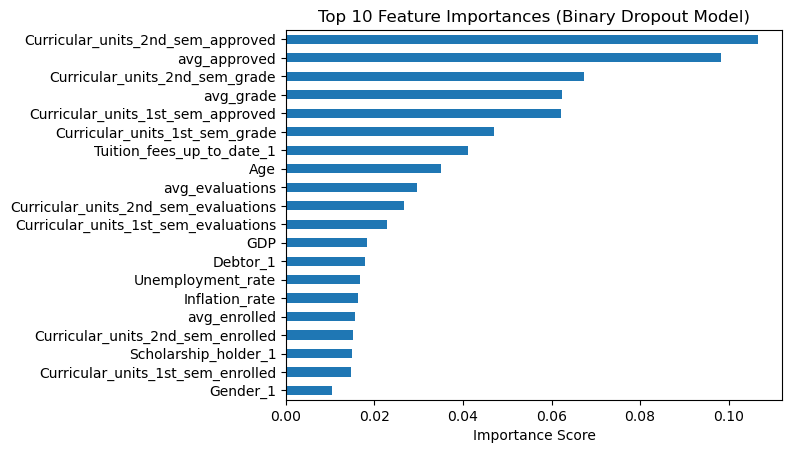

In [72]:
import matplotlib.pyplot as plt

feature_importance.head(20).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Binary Dropout Model)")
plt.xlabel("Importance Score")
plt.show()


In [65]:
from joblib import dump

dump(rf_binary, "dropout_binary_model.joblib")


['dropout_binary_model.joblib']

In [66]:
dump(X_train_enc.columns, "dropout_model_features.joblib")


['dropout_model_features.joblib']

In [67]:
from joblib import load

model_check = load("dropout_binary_model.joblib")
features_check = load("dropout_model_features.joblib")

len(features_check), type(model_check)


(225, sklearn.ensemble._forest.RandomForestClassifier)

In [68]:
list(df.columns)


['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Mother_qualification',
 'Father_qualification',
 'Mother_occupation',
 'Father_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'target_encoded']

In [1]:
import pandas as pd
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

DATASET_PATH = "dataset.csv"

MODEL_OUT = "dropout_binary_model_option1.joblib"
FEATURES_OUT = "dropout_model_features_option1.joblib"

FINAL_FEATURES = [
    "avg_approved",
    "avg_grade",
    "avg_evaluations",
    "Age",
    "Tuition_fees_up_to_date",
    "Debtor",
    "Scholarship_holder",
    "GDP",
    "Inflation_rate",
    "Unemployment_rate",
]

def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(" ", "_")
        .str.replace("/", "_")
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("'", "", regex=False)
    )
    df = df.rename(columns={
        "Nacionality": "Nationality",
        "Age_at_enrollment": "Age"
    })
    return df

def add_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    pairs = [
        ("Curricular_units_1st_sem_credited", "Curricular_units_2nd_sem_credited", "avg_credited"),
        ("Curricular_units_1st_sem_enrolled", "Curricular_units_2nd_sem_enrolled", "avg_enrolled"),
        ("Curricular_units_1st_sem_evaluations", "Curricular_units_2nd_sem_evaluations", "avg_evaluations"),
        ("Curricular_units_1st_sem_approved", "Curricular_units_2nd_sem_approved", "avg_approved"),
        ("Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade", "avg_grade"),
    ]

    for c1, c2, out in pairs:
        if c1 in df.columns and c2 in df.columns:
            df[out] = df[[c1, c2]].mean(axis=1)

    return df

def make_binary_target(y: pd.Series) -> pd.Series:
    # If Target is strings: "Dropout", "Enrolled", "Graduate"
    if y.dtype == "object":
        return y.apply(lambda x: 1 if str(x).lower() == "dropout" else 0).astype(int)

    # If Target numeric: usually 0=Dropout, 1=Enrolled, 2=Graduate
    return y.apply(lambda x: 1 if int(x) == 0 else 0).astype(int)

def main():
    df = pd.read_csv(DATASET_PATH)
    df = clean_columns(df)

    if "Target" not in df.columns:
        raise ValueError("Target column not found in dataset.csv")

    df = add_feature_engineering(df)

    y = make_binary_target(df["Target"])

    # Build X from ONLY the final feature list
    missing = [c for c in FINAL_FEATURES if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in dataset after preprocessing: {missing}")

    X = df[FINAL_FEATURES].copy()

    # Fill missing numeric values with medians
    X = X.apply(pd.to_numeric, errors="coerce")
    X = X.fillna(X.median(numeric_only=True))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    dump(rf, MODEL_OUT)
    dump(FINAL_FEATURES, FEATURES_OUT)

    print(f"\nSaved model -> {MODEL_OUT}")
    print(f"Saved features -> {FEATURES_OUT}")
    print(f"Final input features: {FINAL_FEATURES}")

if __name__ == "__main__":
    main()



Confusion Matrix:
[[701  50]
 [ 93 262]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8829    0.9334    0.9074       751
           1     0.8397    0.7380    0.7856       355

    accuracy                         0.8707      1106
   macro avg     0.8613    0.8357    0.8465      1106
weighted avg     0.8690    0.8707    0.8683      1106


Saved model -> dropout_binary_model_option1.joblib
Saved features -> dropout_model_features_option1.joblib
Final input features: ['avg_approved', 'avg_grade', 'avg_evaluations', 'Age', 'Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder', 'GDP', 'Inflation_rate', 'Unemployment_rate']
